# **Exploratory Data Analysis**

**Import Images from Each Class**

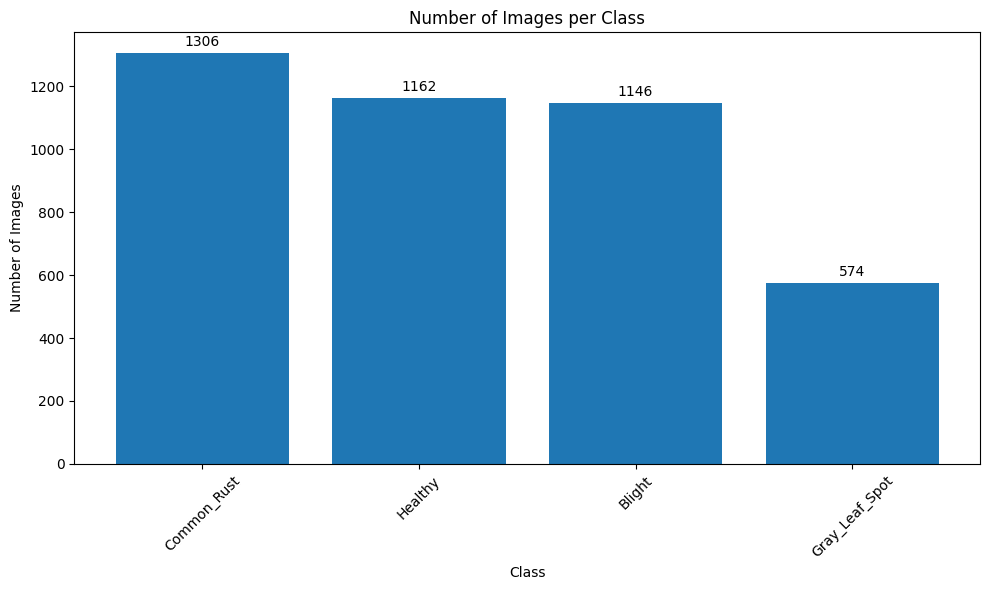

In [2]:
import os
import matplotlib.pyplot as plt

data_dir = r'D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Classification\datasets\data'

def plot_number_images_in_each_class(data_dir):
    if not os.path.exists(data_dir):
        raise ValueError(f"The specified data directory does not exist: {data_dir}")
    
    class_counts = {}

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            class_counts[class_name] = num_images

    sorted_class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # Add number on each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10, color='black')
    plt.show()

plot_number_images_in_each_class(data_dir)

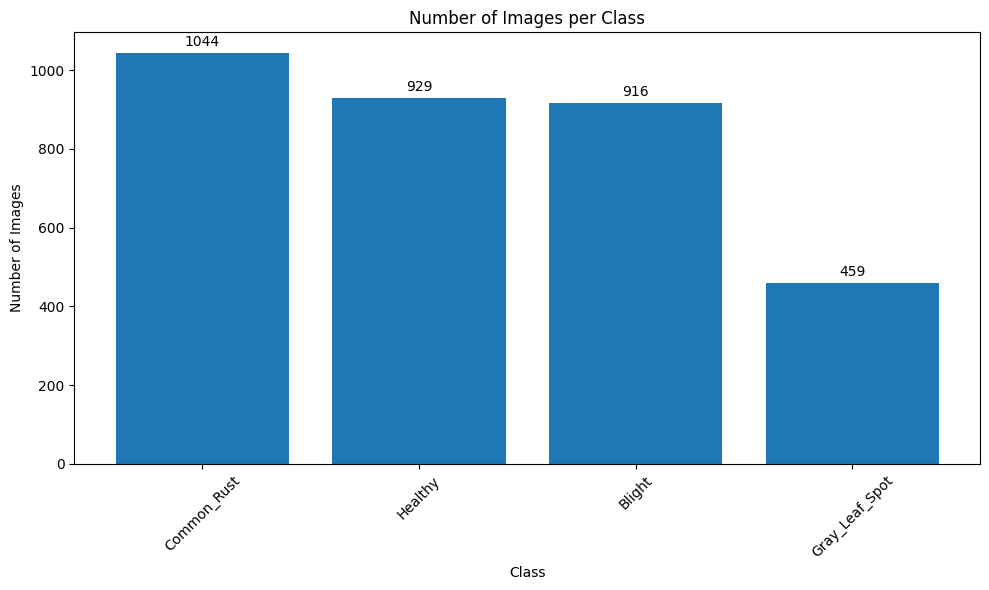

In [3]:
plot_number_images_in_each_class(r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Classification\datasets\processed_data_v2\train")

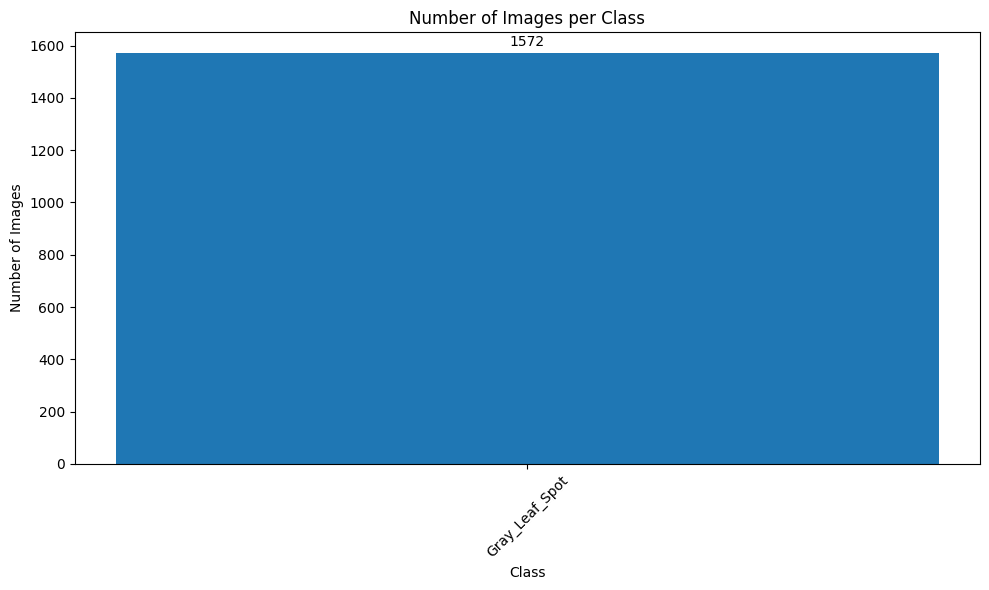

In [7]:
plot_number_images_in_each_class(r"D:\School\ITC\Y3\Semet 2\Mini Project\Project Folder\Corn-Disease-Classification\datasets\data_oversampled")

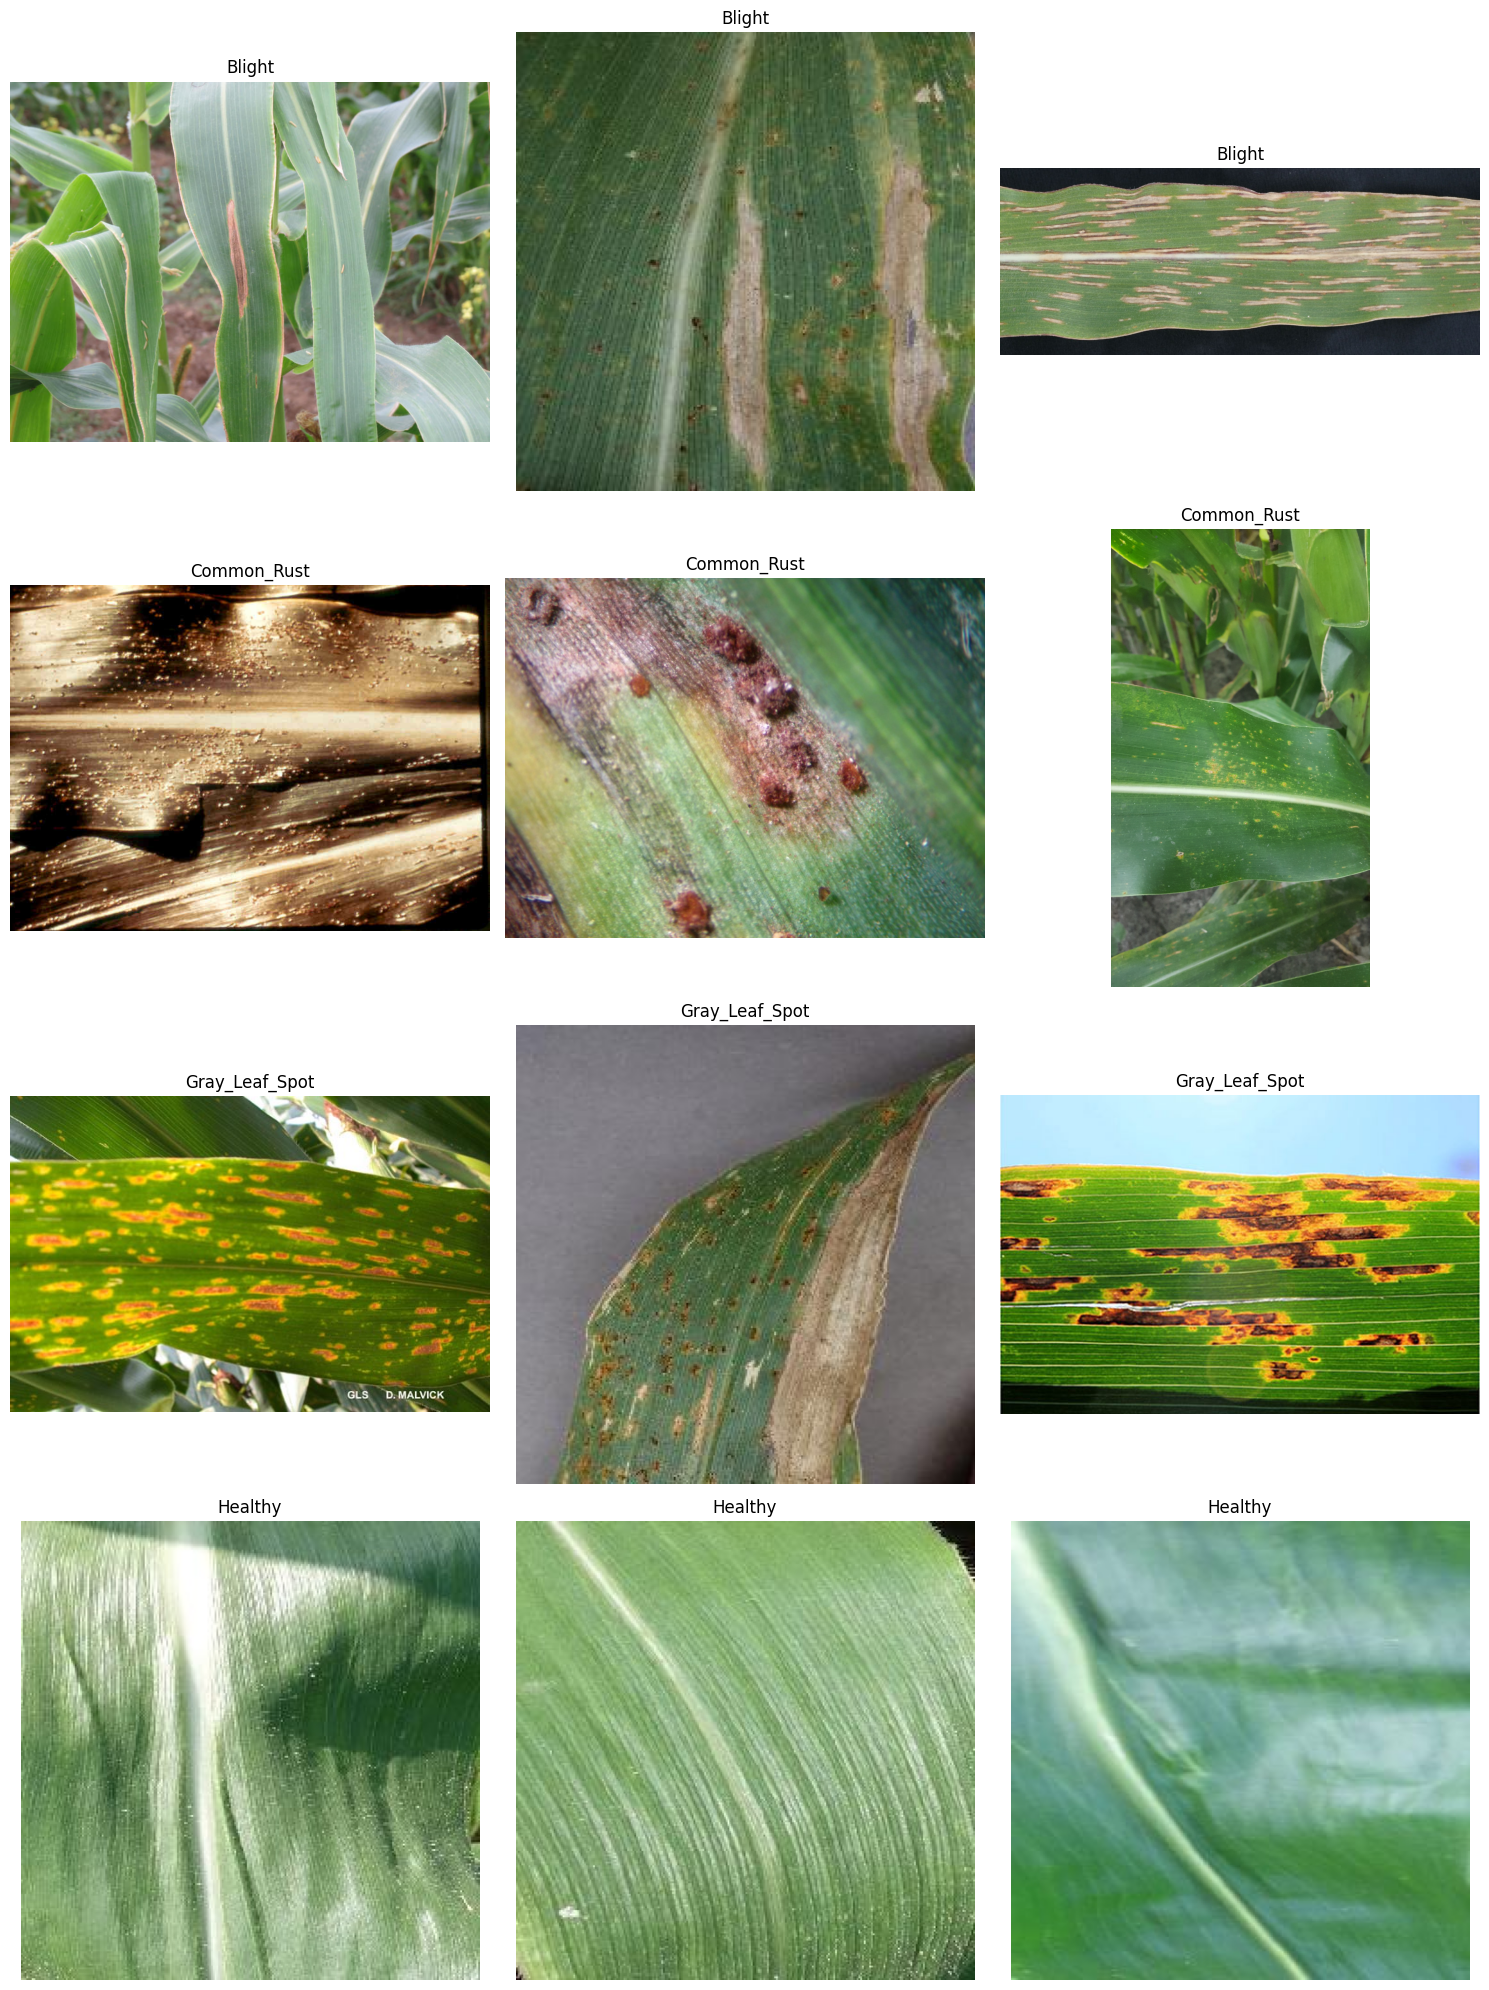

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import random

num_samples_per_class = 3
fig, axes = plt.subplots(num_classes, num_samples_per_class, figsize=(15, 5 * num_classes))
axes = axes.flatten()

image_paths_by_class = {class_name: [path for path, label in image_paths if label == class_name] for class_name in class_names}

for i, class_name in enumerate(class_names):
    samples = random.sample(image_paths_by_class[class_name], min(num_samples_per_class, len(image_paths_by_class[class_name])))
    for j, img_path in enumerate(samples):
        img = Image.open(img_path)
        ax = axes[i * num_samples_per_class + j]
        ax.imshow(img)
        ax.set_title(class_name)
        ax.axis('off')

plt.tight_layout()
plt.show()

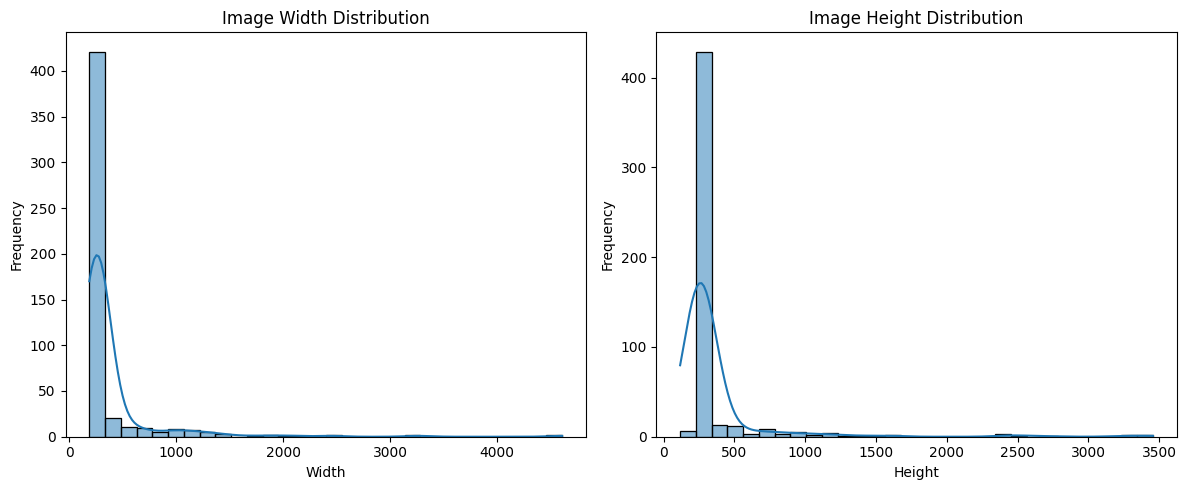

In [7]:
import numpy as np
import seaborn as sns

image_sizes = []
num_samples_to_check = min(500, num_images) 
random.shuffle(image_paths)
for path, _ in image_paths[:num_samples_to_check]:
    try:
        img = Image.open(path)
        width, height = img.size
        image_sizes.append((width, height))
    except Exception as e:
        print(f"Error opening image: {path} - {e}")

widths, heights = zip(*image_sizes)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

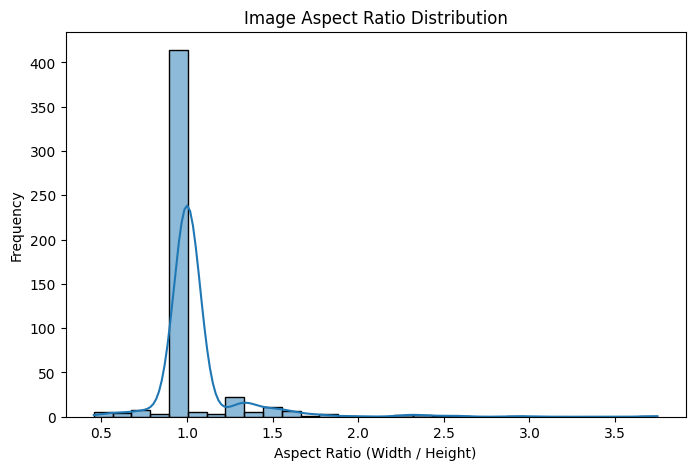

In [8]:
aspect_ratios = [w / h for w, h in image_sizes]
plt.figure(figsize=(8, 5))
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title('Image Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.show()